## Введение в машинное обучение. Лекция 1.
### Основы работы в pandas и seaborn

In [1]:
#загрузим необходимые библиотеки
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # более красивый внешний вид графиков по умолчанию

import os

from pandas_profiling import ProfileReport

In [2]:
#Прочитать данные
cardio = pd.read_csv('cardio_train.csv', sep=';')

Вывод всего датафрейма:

In [3]:
cardio

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]

Вывод первых N строк вашего датафрейма.

In [4]:
cardio.head(20)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0    0  18393       2     168    62.0    110     80            1     1      0   
1    1  20228       1     156    85.0    140     90            3     1      0   
2    2  18857       1     165    64.0    130     70            3     1      0   
3    3  17623       2     169    82.0    150    100            1     1      0   
4    4  17474       1     156    56.0    100     60            1     1      0   
5    8  21914       1     151    67.0    120     80            2     2      0   
6    9  22113       1     157    93.0    130     80            3     1      0   
7   12  22584       2     178    95.0    130     90            3     3      0   
8   13  17668       1     158    71.0    110     70            1     1      0   
9   14  19834       1     164    68.0    110     60            1     1      0   
10  15  22530       1     169    80.0    120     80            1     1      0   
11  16  18815       2     173    60.0    120     80            1     1      0   
12  18  14791       2     165    60.0    120     80            1     1      0   
13  21  19809       1     158    78.0    110     70            1     1      0   
14  23  14532       2     181    95.0    130     90            1     1      1   
15  24  16782       2     172   112.0    120     80            1     1      0   
16  25  21296       1     170    75.0    130     70            1     1      0   
17  27  16747       1     158    52.0    110     70            1     3      0   
18  28  17482       1     154    68.0    100     70            1     1      0   
19  29  21755       2     162    56.0    120     70            1     1      1   

    alco  active  cardio  
0      0       1       0  
1      0       1       1  
2      0       0       1  
3      0       1       1  
4      0       0       0  
5      0       0       0  
6      0       1       0  
7      0       1       1  
8      0       1       0  
9      0       0       0  
10     0       1       0  
11     0       1       0  
12     0       0       0  
13     0       1       0  
14     1       1       0  
15     0       0       1  
16     0       0       0  
17     0       1       0  
18     0       0       0  
19     0       1       0

Если признаков (столбцов) слишком много, полезно будет транспонировать вывод:

In [5]:
cardio.head(10).T

0        1        2        3        4        5        6  \
id               0.0      1.0      2.0      3.0      4.0      8.0      9.0   
age          18393.0  20228.0  18857.0  17623.0  17474.0  21914.0  22113.0   
gender           2.0      1.0      1.0      2.0      1.0      1.0      1.0   
height         168.0    156.0    165.0    169.0    156.0    151.0    157.0   
weight          62.0     85.0     64.0     82.0     56.0     67.0     93.0   
ap_hi          110.0    140.0    130.0    150.0    100.0    120.0    130.0   
ap_lo           80.0     90.0     70.0    100.0     60.0     80.0     80.0   
cholesterol      1.0      3.0      3.0      1.0      1.0      2.0      3.0   
gluc             1.0      1.0      1.0      1.0      1.0      2.0      1.0   
smoke            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
alco             0.0      0.0      0.0      0.0      0.0      0.0      0.0   
active           1.0      1.0      0.0      1.0      0.0      0.0      1.0   
cardio           0.0      1.0      1.0      1.0      0.0      0.0      0.0   

                   7        8        9  
id              12.0     13.0     14.0  
age          22584.0  17668.0  19834.0  
gender           2.0      1.0      1.0  
height         178.0    158.0    164.0  
weight          95.0     71.0     68.0  
ap_hi          130.0    110.0    110.0  
ap_lo           90.0     70.0     60.0  
cholesterol      3.0      1.0      1.0  
gluc             3.0      1.0      1.0  
smoke            0.0      0.0      0.0  
alco             0.0      0.0      0.0  
active           1.0      1.0      0.0  
cardio           1.0      0.0      0.0

Есть много способов узнать информацию о датафрейме, ниже собраны варианты для этого:

In [6]:
# Метод info() позволяет вывести общую информацию о датасете
# Мы можем узнать тип каждого признака, а также есть ли в данных пропуски
cardio.info()

##Получение иинформации о датафрейме
cardio.dtypes #типы переменных в датафрейме


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [7]:
# Метод describe() позволяет собрать некоторую статистику по каждому числовому признаку
# Для более удобного прочтения полученную таблицу можно транспонировать
cardio.describe().T

count          mean           std      min       25%      50%  \
id           70000.0  49972.419900  28851.302323      0.0  25006.75  50001.5   
age          70000.0  19468.865814   2467.251667  10798.0  17664.00  19703.0   
gender       70000.0      1.349571      0.476838      1.0      1.00      1.0   
height       70000.0    164.359229      8.210126     55.0    159.00    165.0   
weight       70000.0     74.205690     14.395757     10.0     65.00     72.0   
ap_hi        70000.0    128.817286    154.011419   -150.0    120.00    120.0   
ap_lo        70000.0     96.630414    188.472530    -70.0     80.00     80.0   
cholesterol  70000.0      1.366871      0.680250      1.0      1.00      1.0   
gluc         70000.0      1.226457      0.572270      1.0      1.00      1.0   
smoke        70000.0      0.088129      0.283484      0.0      0.00      0.0   
alco         70000.0      0.053771      0.225568      0.0      0.00      0.0   
active       70000.0      0.803729      0.397179      0.0      1.00      1.0   
cardio       70000.0      0.499700      0.500003      0.0      0.00      0.0   

                  75%      max  
id           74889.25  99999.0  
age          21327.00  23713.0  
gender           2.00      2.0  
height         170.00    250.0  
weight          82.00    200.0  
ap_hi          140.00  16020.0  
ap_lo           90.00  11000.0  
cholesterol      2.00      3.0  
gluc             1.00      3.0  
smoke            0.00      1.0  
alco             0.00      1.0  
active           1.00      1.0  
cardio           1.00      1.0

In [8]:
#Функция, которая позволяет отобрать колонки по типу данных содержащихся в них
cardio.select_dtypes(include = 'int64', exclude = 'float64').head()

id    age  gender  height  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   0  18393       2     168    110     80            1     1      0     0   
1   1  20228       1     156    140     90            3     1      0     0   
2   2  18857       1     165    130     70            3     1      0     0   
3   3  17623       2     169    150    100            1     1      0     0   
4   4  17474       1     156    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0

Смотря на пример выше -- можно через точку указать несколько последовательных операций (по аналогии с dplyr в R).

#### Как нам отобрать нужные колонки:

In [9]:
cardio['height'] #по названию
cardio[['id', 'height']] # если нужно несколько, то список
cardio.ap_hi #через точку

0        110
1        140
2        130
3        150
4        100
        ... 
69995    120
69996    140
69997    180
69998    135
69999    120
Name: ap_hi, Length: 70000, dtype: int64

## Выборка данных по условию. Способы индексирования в Pandas

In [10]:
cardio_height = cardio['height'] # сохраним всю колонку "рост" в отдельную переменную для экспериментов
type(cardio_height) # посмотрим тип 

pandas.core.series.Series

In [11]:
cardio_height[cardio_height < 130]

224       76
3420     100
3735     120
3752     120
4212     120
        ... 
65302     99
66023    120
66479    110
66643     57
69052    120
Name: height, Length: 92, dtype: int64

Обращение к строкам происходит при помощи .iloc() --- неявный индекс (implicit loc). Обратите внимание на то, что loc берёт строки включая последнюю, а iloc нет. В практическом плане для нас это означает, что если мы хотим взять 5 первых строк, то для функции loc интервал будет [0:4], а для фукции iloc [0:5].

In [12]:
first_patient = cardio.iloc[0]
print(first_patient)

id                 0.0
age            18393.0
gender             2.0
height           168.0
weight            62.0
ap_hi            110.0
ap_lo             80.0
cholesterol        1.0
gluc               1.0
smoke              0.0
alco               0.0
active             1.0
cardio             0.0
Name: 0, dtype: float64


Давайте узнаем возраст первого пациента:


In [13]:
print(cardio.loc[0, 'age'])

18393


Возраст измерен в днях, что не очень интуитивно, хоть и правильно с точки зрения измерений. Давайте переведем возраст в года


In [14]:
cardio['age'] = (cardio['age'] / 365).round()

print(cardio.loc[0, 'age'])

50.0


In [15]:
# Вычислим средний возраст людей, склонных к курению
cardio[cardio['smoke'] == 1]['age'].mean()

52.29664451288701

In [16]:
# Условие может быть составным
cardio[(cardio['smoke'] == 1) & (cardio['cardio'] == 1)]['age'].mean()

53.76135199726869

Логические операторы:

    x & y  -- логический оператор AND;
    x | y  -- логический оператор OR;
    ~x     -- логический оператор NOT;

### Группировка датафрейма
Метод groupby работает аналогично операции GROUP BY в языке SQL и позволяет группировать данные по одному или нескольким атрибутам, вычисляя затем агрегированные показатели в каждой группе.

In [17]:
cardio.groupby('cardio')['age'].mean()

cardio
0    51.731218
1    54.948083
Name: age, dtype: float64

### Фильтрация

In [18]:
# Удалим целевой признак cardio
dummy_cardio_1 = cardio.drop('cardio', axis=1)
dummy_cardio_1.head()

id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.0       2     168    62.0    110     80            1     1      0   
1   1  55.0       1     156    85.0    140     90            3     1      0   
2   2  52.0       1     165    64.0    130     70            3     1      0   
3   3  48.0       2     169    82.0    150    100            1     1      0   
4   4  48.0       1     156    56.0    100     60            1     1      0   

   alco  active  
0     0       1  
1     0       1  
2     0       0  
3     0       1  
4     0       0

In [19]:
# Удалим всех пациентов с ростом ниже 140 см, а также выше 190 см
dummy_cardio = cardio.drop(cardio[(cardio['height'] < 140) | (cardio['height'] > 190)].index)
dummy_cardio.shape[0] / cardio.shape[0]

0.9969142857142858

### Добавить новые признаки

In [20]:
# давайте пересчитаем рост наших пациентов из сантиметров в метры:
cardio['height_cm'] = cardio['height'] / 100
cardio.head()

id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.0       2     168    62.0    110     80            1     1      0   
1   1  55.0       1     156    85.0    140     90            3     1      0   
2   2  52.0       1     165    64.0    130     70            3     1      0   
3   3  48.0       2     169    82.0    150    100            1     1      0   
4   4  48.0       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  height_cm  
0     0       1       0       1.68  
1     0       1       1       1.56  
2     0       0       1       1.65  
3     0       1       1       1.69  
4     0       0       0       1.56

### Перекодировка значений признаков

In [21]:
#Сделаем искусственную ситуацию. Перекодируем обратно из цифровых показателей уровень холестерола 
chol_values = {1:'low', 2:'normal', 3:'high'} # обычный словарь Python
cardio['dummy_cholesterol'] = cardio['cholesterol'].map(chol_values)
cardio.head()

id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.0       2     168    62.0    110     80            1     1      0   
1   1  55.0       1     156    85.0    140     90            3     1      0   
2   2  52.0       1     165    64.0    130     70            3     1      0   
3   3  48.0       2     169    82.0    150    100            1     1      0   
4   4  48.0       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  height_cm dummy_cholesterol  
0     0       1       0       1.68               low  
1     0       1       1       1.56              high  
2     0       0       1       1.65              high  
3     0       1       1       1.69               low  
4     0       0       0       1.56               low

In [22]:
#Чаще нам придется применять перекодировку в значения TRUE|FALSE
cardio_bul = cardio
cardio_bul['cardio'] = cardio_bul['cardio'].astype(bool)
cardio_bul.head()

id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.0       2     168    62.0    110     80            1     1      0   
1   1  55.0       1     156    85.0    140     90            3     1      0   
2   2  52.0       1     165    64.0    130     70            3     1      0   
3   3  48.0       2     169    82.0    150    100            1     1      0   
4   4  48.0       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  height_cm dummy_cholesterol  
0     0       1   False       1.68               low  
1     0       1    True       1.56              high  
2     0       0    True       1.65              high  
3     0       1    True       1.69               low  
4     0       0   False       1.56               low

#### Сводные таблицы
Эти таблицы нужны в том случае, если вы хотите проанализировать больше 2-х признаков за раз.
Рассмотрим, как с помощью сводной таблицы ответить на вопросы:

    верно ли, что с возрастом люди становятся более склонны к употреблению алкоголя;
    верно ли, что среди курящих процент ССЗ больше.


In [23]:
# values - признаки, по которым вычисляются значения функции aggfunc
# index - признаки, по которым выполняется группировка
cardio.pivot_table(values=['age', 'cardio'], index=['smoke', 'alco'], aggfunc='mean')


age    cardio
smoke alco                     
0     0     53.449185  0.501462
      1     53.121990  0.523037
1     0     52.493627  0.487833
      1     51.838188  0.444444

### Если мы хотим всё и сразу -- есть Pandas profiling
Он позволяет сразу из коробки получить отчет по данным. Правда строит чень долго)

In [24]:
profile = ProfileReport(cardio, title = 'Pandas Profiling Report')
profile

## Графика в python
Часто нам необходимо прикинуть, а как вообще выглядят наши переменные.

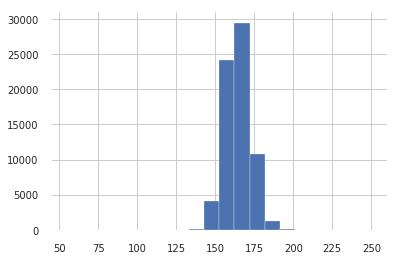

In [25]:
#самое простое, что можно сделать -- построить гистограмму
cardio['height'].hist(bins=20)

Но, гистрограммы менее информативны и не могут показать выбросы. Лучше построить боксплоты.

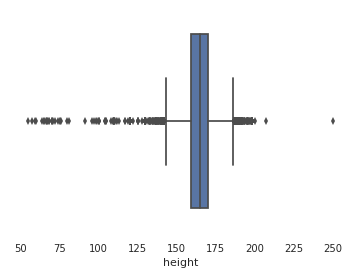

In [26]:
sns.boxplot(cardio['height'])

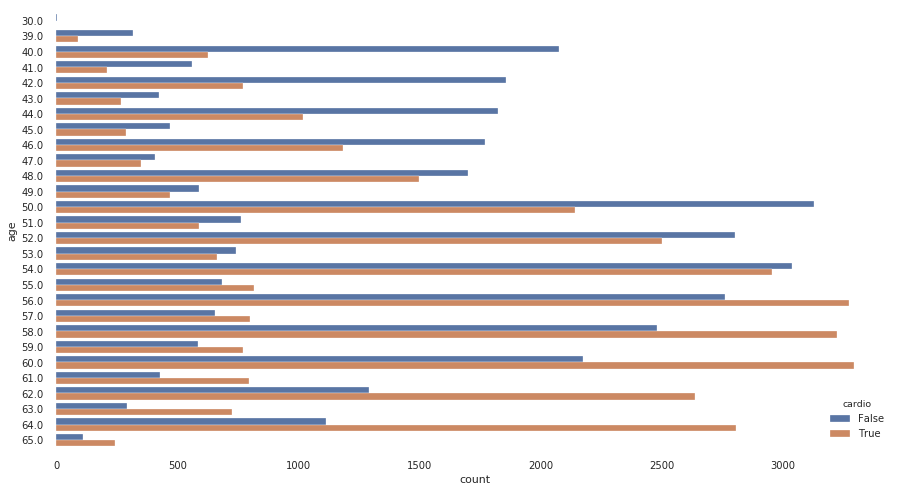

In [27]:
#Теперь попробуем посмотреть, как распределено количество здоровых и больных пациентов по возрастным группам. 
plt.figure(figsize = (15, 8)) # увеличим размер картинки
sns.countplot(y = 'age', hue = 'cardio', data = cardio);

На что можно посмотреть ещё... например на диаграмму рассеивания, чтобы оценить -- нет ли изменений по росту. 

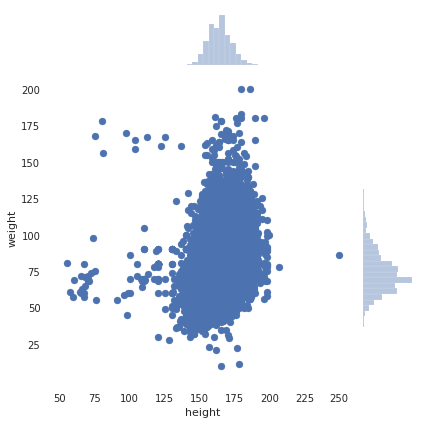

In [28]:
sns.jointplot(x = 'height', y = 'weight', data = cardio)

Теперь давайте посмотрим на то, различается ли средний возраст людей с сердечно-сосудистыми заболеваниями и без них (точнее -- визуализируем).

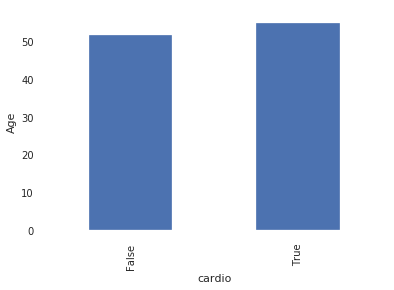

In [29]:
cardio.groupby('cardio')['age'].mean().plot(kind = 'bar') 
plt.ylabel('Age') # добавляем подпись на оси Оу
plt.show();

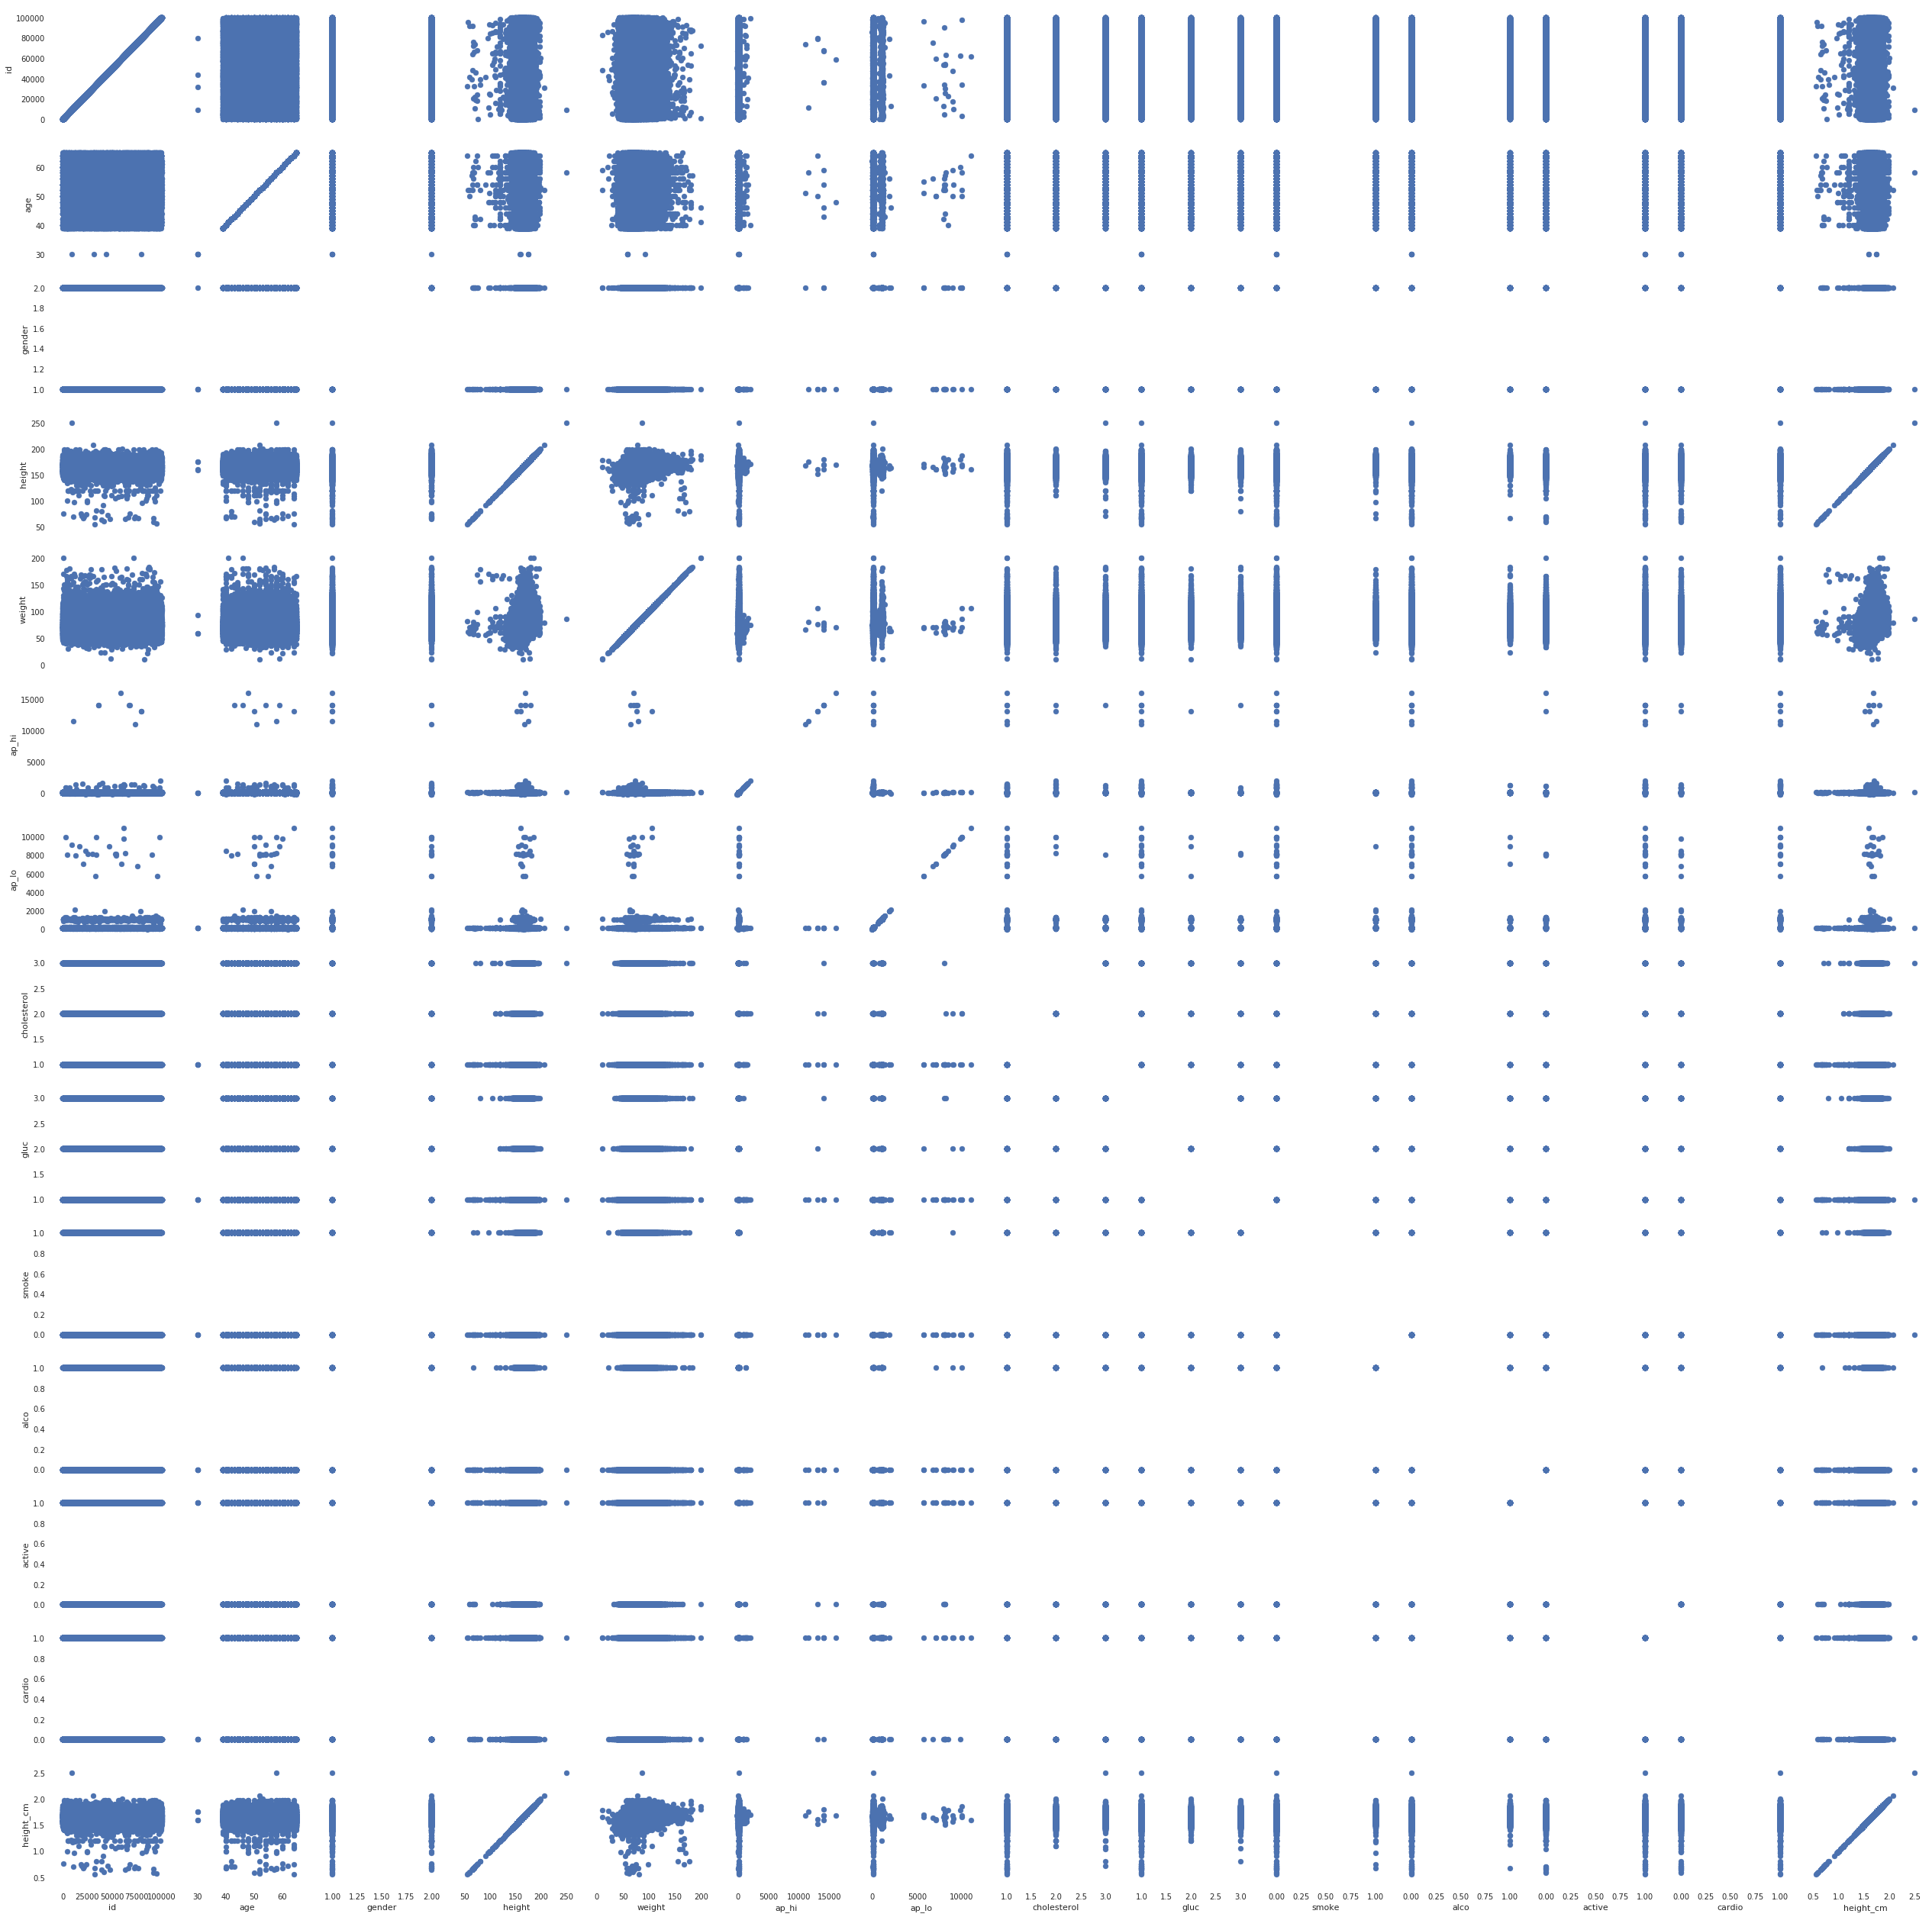

In [30]:
g = sns.PairGrid(cardio)
g.map(plt.scatter)

### Немного графики на встроенном датасете (из документации)

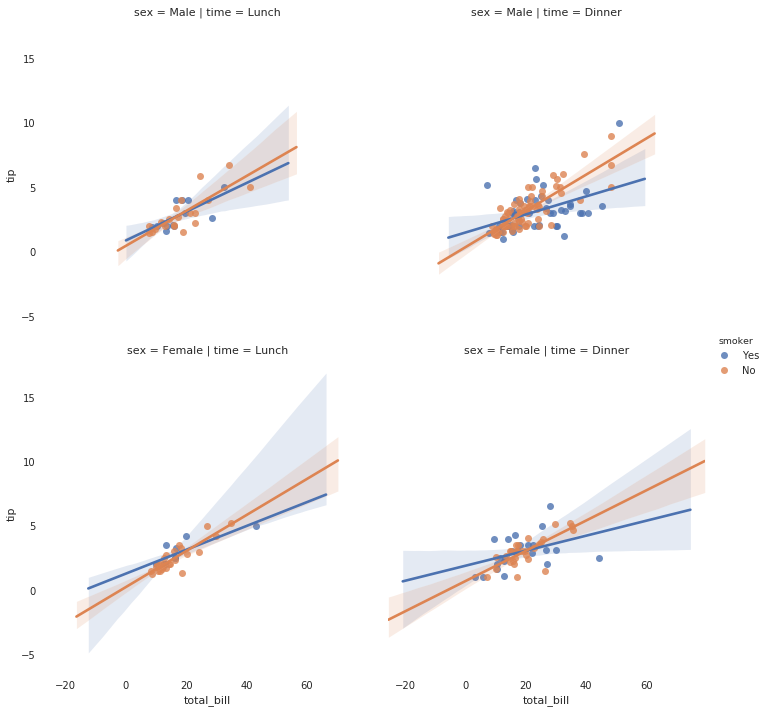

In [31]:
tips = sns.load_dataset("tips")
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

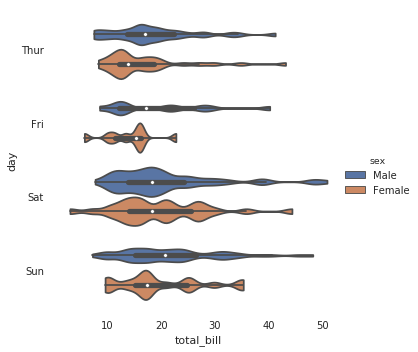

In [32]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", bw=.15, cut=0,
            data=tips);

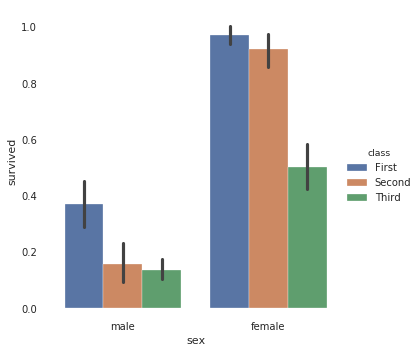

In [33]:
#Если мы хотим построить барплот
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

Ссылки на то, что может быть полезно:
1. http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3 #cheat_sheet по pandas, но лучше всё-таки читать документацию
2. https://seaborn.pydata.org/ #оригинальная документация к seaborn
3. https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html #ещё больше pandas